# $\text{Exact diagonalization of the } 0 - \pi \text{ qubit Hamiltonian} - E \text{ } vs \text{ } E_J$

In [124]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math

In [125]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [126]:
#Construction of necessary elements of theta and phi Hilbert spaces

# For phi

N=50
a_phi=np.diag(np.sqrt(np.arange(1, N+1)), 1)
ad_phi=np.diag(np.sqrt(np.arange(1, N+1)), -1)
N_phi=ad_phi@a_phi
Id_N=np.eye(N+1)

# For theta

M=50
Id_M=np.eye(2*M+1)
n_theta=np.flipud(np.fliplr(np.diag(np.arange(-M,M+1), 0)))

# Qubit parameters

ng=0.5
phi_ext=np.pi

# Qubit parameters 1

E_Cs=1.0
E_Cj=1.0
E_L=1.0
alpha=(1j*(E_Cj/E_L)**(1.0/4.0))

#Qubit parameters 2

E_Cs_2=(1.0/20)
E_Cj_2=1.0
E_L_2=(1.0/16)
alpha2=(1j*(E_Cj_2/E_L_2)**(1.0/4.0))

#For calculations

E_J=np.arange(0,1.01,0.01)#1.2
Energies=[]
E_J_2=np.arange(0,0.41,0.01)#0.41
Energies2=[]

In [127]:
(0.5*((displace(N+1,alpha)*(math.e**(-1j*phi_ext/2)))+(displace(N+1,-alpha)*(math.e**(1j*phi_ext/2)))))#*np.diag(np.ones(N+1),0)

Quantum object: dims = [[51], [51]], shape = (51, 51), type = oper, isherm = True
Qobj data =
[[ 0.          0.60653066  0.         ...  0.          0.
   0.        ]
 [ 0.60653066  0.          0.42888194 ...  0.          0.
   0.        ]
 [ 0.          0.42888194  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.         -0.09725028
   0.        ]
 [ 0.          0.          0.         ... -0.09725028  0.
  -0.04788186]
 [ 0.          0.          0.         ...  0.         -0.04788186
   0.        ]]

In [128]:
# Construction of the 0-pi Hamiltonian

def Hamiltonian_0pi(EJ,ECS,ECJ,EL,n,phi,alph):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))   #,dtype=complex
    #Free Hamiltonian construction
    H1=4*ECS*((n_theta-n*Id_M)@(n_theta-n*Id_M))
    H_theta=np.kron(H1,Id_N)
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)  #2*
    H_phi=np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1)
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta[0][2*M]+=1
    cos_theta[2*M][0]+=1
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi/2)))
    #H_I=2*EJ*np.kron(cos_theta,Id_N)@np.kron(Id_M,cos_phi.real)
    H_I=EJ*np.kron(cos_theta,cos_phi.real) #HE QUITADO EL DOOOOOOOOOSSSSSS
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I  #.astype(complex)
    return H

In [129]:
# Construction of the 0-pi Hamiltonian LOW ENERGY APPROXIMATION

def Hamiltonian_0pi_approx(EJ,ECS,ECJ,EL,n):
    #Initial
    H=np.zeros((2*M+1,2*M+1))   #,dtype=complex
    H1=4*ECS*((n_theta-n*Id_M)@(n_theta-n*Id_M))+(np.sqrt(ECJ*EL)*Id_M)
    #Interaction Hamiltonian construction
    cos_2theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_2theta[0][2*M]+=1
    cos_2theta[2*M][0]+=1
    cos_theta=(np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1))
    cos_theta[0][2*M]+=1
    cos_theta[2*M][0]+=1
    H2=(EJ*EJ/ECJ)*(1+np.sqrt(EL/ECJ))*(cos_2theta+Id_M)/2 #*(cos_theta@cos_theta)
    H3=(EJ*EJ*ECS/ECJ)*(1+3*np.sqrt(EL/ECJ))*(Id_M-cos_2theta)/2 # *(Id_M-(cos_theta@cos_theta))
    #H_I=np.zeros(((N+1),(N+1)))
    #Total Hamiltonian
    H+=H1-H2+H3  #.astype(complex)
    return H

## $\text{1. Plot for }$ $E_{Cs} = E_{CJ} = E_L = 1$, $n_g = \frac{1}{2}$, $\alpha = i \left(\frac{E_{CJ}}{E_L}\right)^{1/4} = i$.

In [130]:
#Calculation 1

for EJ1 in E_J:
    print("Step for EJ = ",EJ1)
    H_0pi=Hamiltonian_0pi_approx(EJ1,E_Cs,E_Cj,E_L,ng)
    print("Hamiltonian built, len(H)=",len(H_0pi)**2)
    vals, _ = eigsh(H_0pi, k=6, which='SA')
    #vals,_=np.linalg.eigh(H_0pi)
    print("1st and 2nd degenerated vals are",vals[0], vals[1],"3rd and 4th degenerated vals", vals[2], vals[3])
    print("Eigenvalues calculated")
    #vals,vects=np.linalg.eigh(H)
    Energies.append(vals) #-vals[0]

Step for EJ =  0.0
Hamiltonian built, len(H)= 10201
1st and 2nd degenerated vals are 1.9999999999994122 1.999999999999551 3rd and 4th degenerated vals 9.999999999999659 10.00000000000025
Eigenvalues calculated
Step for EJ =  0.01
Hamiltonian built, len(H)= 10201
1st and 2nd degenerated vals are 2.000099984998927 2.0000999850001078 3rd and 4th degenerated vals 10.000100008999286 10.000100009000317
Eigenvalues calculated
Step for EJ =  0.02
Hamiltonian built, len(H)= 10201
1st and 2nd degenerated vals are 2.000399759998371 2.000399759999903 3rd and 4th degenerated vals 10.000400143998242 10.000400144000286
Eigenvalues calculated
Step for EJ =  0.03
Hamiltonian built, len(H)= 10201
1st and 2nd degenerated vals are 2.0008987849996176 2.0008987850001265 3rd and 4th degenerated vals 10.000900728998873 10.000900728999888
Eigenvalues calculated
Step for EJ =  0.04
Hamiltonian built, len(H)= 10201
1st and 2nd degenerated vals are 2.0015961600003136 2.001596160001467 3rd and 4th degenerated vals

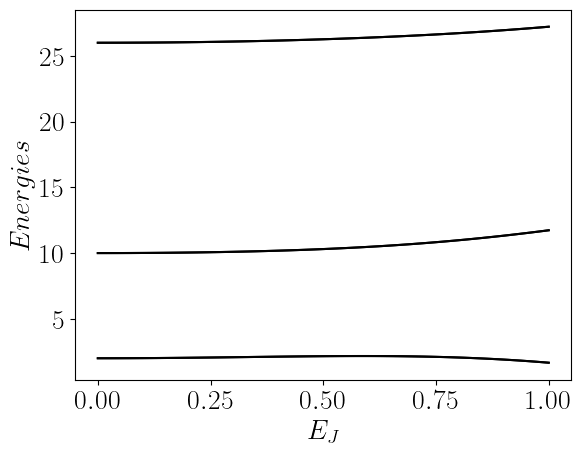

In [131]:
#Plot 1

plt.plot(E_J,Energies,c="k")
#plt.ylim(0,11)
#plt.ylim(1.7,4.2)
#plt.xlim(-0.05,0.4)
plt.xlabel('$E_J$')
plt.ylabel('$Energies$')
#plt.savefig('Energies_vs_EJ_M20N20_SEMICLASAPROX.pdf')
plt.show()

## $\text{2. Plot for }$ $E_{Cs} = \frac{1}{20}$, $E_{CJ} = 1$, $E_L = \frac{1}{16}$, $n_g = \frac{1}{2}$, $\alpha = i \left(\frac{E_{CJ}}{E_L}\right)^{1/4} = 2i$.

In [132]:
#Calculation 2

for EJ2 in E_J_2:
    print("Step for EJ = ",EJ2)
    H_0pi_2=Hamiltonian_0pi_approx(EJ2,E_Cs_2,E_Cj_2,E_L_2,ng)
    print("Hamiltonian built, len(H)=",len(H_0pi_2)**2)
    vals2, _ = eigsh(H_0pi_2, k=6, which='SA')
    #vals2,_=np.linalg.eigh(H_0pi_2)
    print("1st and 2nd degenerated vals are",vals2[0], vals2[1],"3rd adn 4th degenerated vals", vals2[2], vals2[3])
    print("Eigenvalues calculated")
    #vals2,vects2=np.linalg.eigh(H2)
    Energies2.append(vals2)

Step for EJ =  0.0
Hamiltonian built, len(H)= 10201
1st and 2nd degenerated vals are 0.29999999999997784 0.30000000000004917 3rd adn 4th degenerated vals 0.6999999999999181 0.6999999999999825
Eigenvalues calculated
Step for EJ =  0.01
Hamiltonian built, len(H)= 10201
1st and 2nd degenerated vals are 0.2999418600924667 0.2999418600924919 3rd adn 4th degenerated vals 0.6999418839445827 0.6999418839446371
Eigenvalues calculated
Step for EJ =  0.02
Hamiltonian built, len(H)= 10201
1st and 2nd degenerated vals are 0.29976726147926086 0.2997672614792657 3rd adn 4th degenerated vals 0.6997676431123498 0.6997676431123702
Eigenvalues calculated
Step for EJ =  0.03
Hamiltonian built, len(H)= 10201
1st and 2nd degenerated vals are 0.2994756674909383 0.29947566749095056 3rd adn 4th degenerated vals 0.6994775995042765 0.699477599504341
Eigenvalues calculated
Step for EJ =  0.04
Hamiltonian built, len(H)= 10201
1st and 2nd degenerated vals are 0.29906618369334664 0.2990661836933881 3rd adn 4th degen

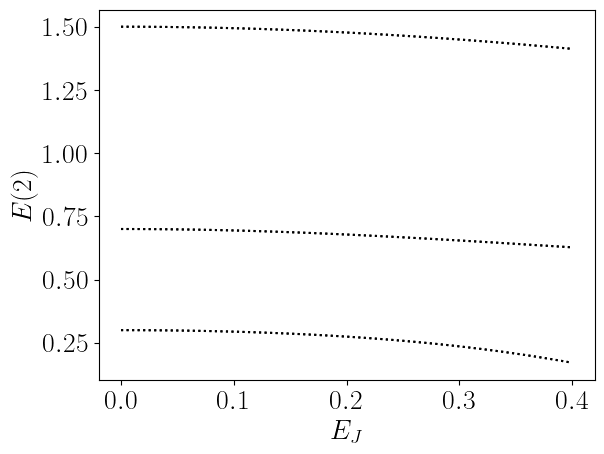

In [133]:
#Plot 2
#Energies2APPROX=np.array(Energies2)
#np.save('Energies2APPROX_M20N50.npy',Energies2APPROX)
plt.plot(E_J_2,Energies2,c="k",ls=":")
#plt.ylim(0.1,1.56)
#plt.xlim(-0.02,0.42)
plt.xlabel('$E_J$')
plt.ylabel('$E (2)$')
#plt.savefig('Energies2_vs_EJ_M20N20_SEMICLASAPROX_3.pdf')
#plt.savefig('Energies2_vs_EJ_M20N20_SEMICLASAPROX_3.png',dpi=300,bbox_inches='tight')
plt.show()

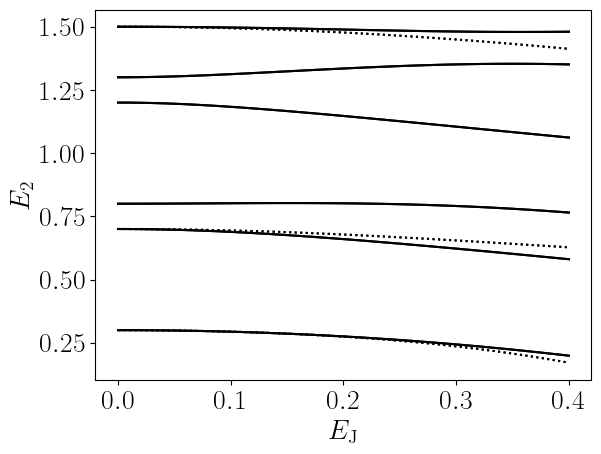

In [136]:
Allenergies2EJ=np.load('Allenergies2EJ_M20N50.npy')
Energies2APPROX=np.load('Energies2APPROX_M20N50.npy')
plt.plot(E_J_2,Energies2APPROX,c="k",ls=":")
plt.plot(E_J_2, Allenergies2EJ, c="k")
plt.xlabel(r'$E_{\rm J}$')
plt.ylabel(r'$E_2$')
#plt.savefig('Energies2APPROX_vs_EJ_M20N50_INTNO2.png',dpi=300,bbox_inches='tight')
plt.show()